In [45]:
pip install yfinance mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import yfinance as yf

data = yf.download("SPY",auto_adjust=True)

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
1993-01-29,25.456197,25.456197,25.329549,25.438105,1003200
1993-02-01,25.456188,25.619020,25.456188,25.619020,480500
1993-02-02,25.600928,25.691390,25.546650,25.673298,201300
1993-02-03,25.709492,25.962787,25.691399,25.944695,529400
1993-02-04,26.035153,26.107523,25.745673,26.053246,531500
...,...,...,...,...,...
2022-08-22,417.049988,417.230011,412.399994,413.350006,77695600
2022-08-23,412.899994,415.420013,411.769989,412.350006,49105200
2022-08-24,412.109985,415.109985,411.390015,413.670013,49177800


# 1. Graficos

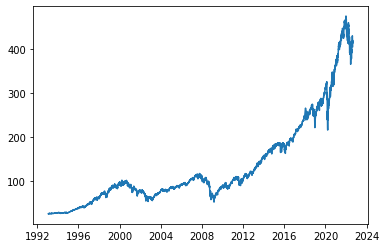

In [3]:
import matplotlib.pyplot as plt
# https://matplotlib.org

plt.plot(data['Close'])

Text(0.5, 1.0, 'precio SPY')

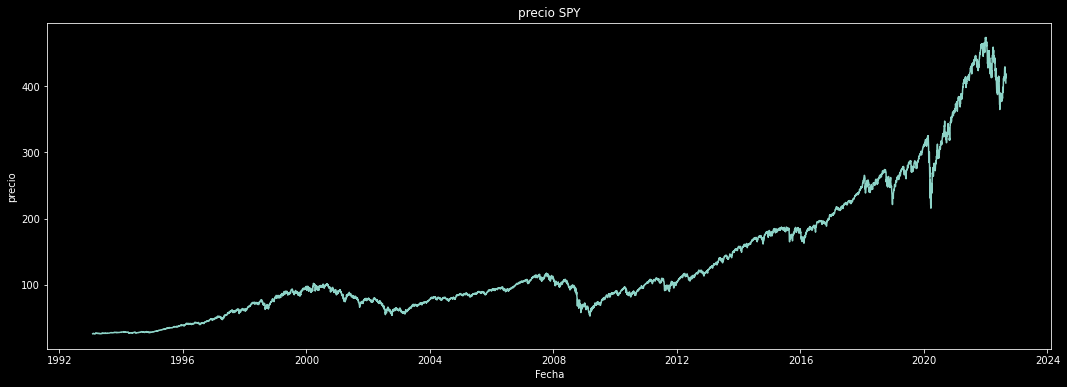

In [4]:
import matplotlib.pyplot as plt
# https://matplotlib.org


plt.style.use('dark_background') #Estilo de grafico classic, default, ggplot, dark_background
plt.figure(figsize=(18,6)) #tamaño de grafico

plt.plot(data['Close'])

plt.xlabel('Fecha')  # label eje x
plt.ylabel('precio') # label eje y
plt.title('precio SPY')  # titulo de grafico

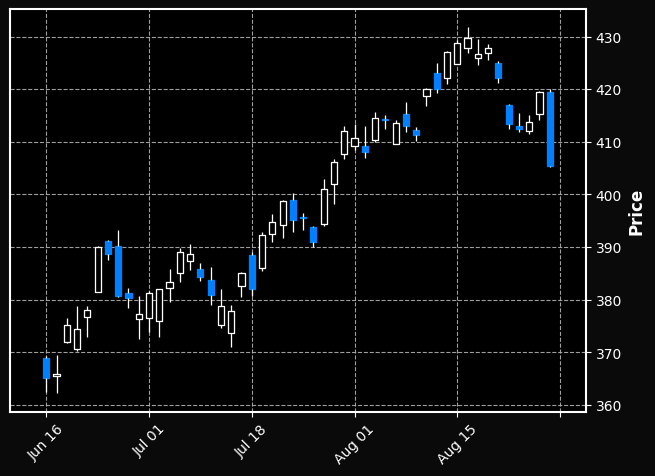

In [5]:
import mplfinance as mpf
# https://github.com/matplotlib/mplfinance


mpf.plot(data[-50:],type='candle',style='mike') 

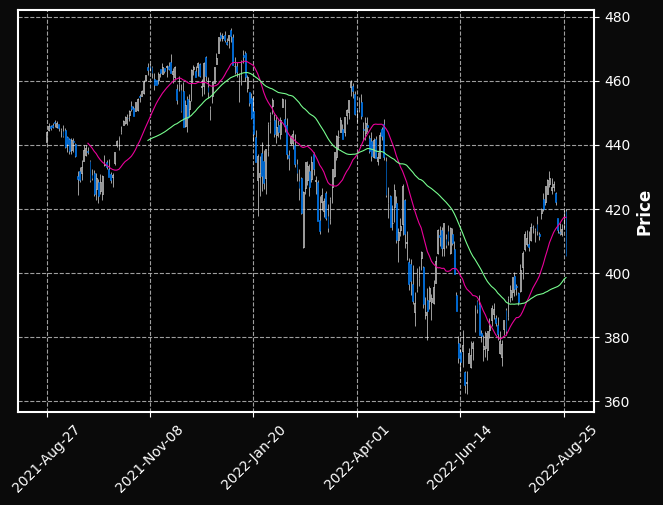

In [6]:
mpf.plot(data[-252:],type='candle',volume=False, mav=(21,50),style='mike') #styles yahoo, charles,starsandstripes

In [7]:
import plotly.graph_objects as go

#https://plotly.com

df=data[-252:]


fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])


fig.update_layout(template = 'plotly_dark',
                  xaxis_title='fecha',
                  yaxis_title='Precio',
                  title_text="SPY")

fig.show()

# 2. Distribucion de retornos diarios

\begin{align}
\% variacion_i=\frac{(Close_i - Close_{i-1})} {Close_{i-1}} *100
\end{align}

In [15]:
data['Var_%']=data['Close'].pct_change()*100

data

,Open,High,Low,Close,Volume,Var_%
Date,,,,,,
1993-01-29,25.456197,25.456197,25.329549,25.438105,1003200,NaN
1993-02-01,25.456188,25.619020,25.456188,25.619020,480500,0.711200
1993-02-02,25.600928,25.691390,25.546650,25.673298,201300,0.211864
1993-02-03,25.709492,25.962787,25.691399,25.944695,529400,1.057116
1993-02-04,26.035153,26.107523,25.745673,26.053246,531500,0.418394
...,...,...,...,...,...,...
2022-08-22,417.049988,417.230011,412.399994,413.350006,77695600,-2.082250
2022-08-23,412.899994,415.420013,411.769989,412.350006,49105200,-0.241926
2022-08-24,412.109985,415.109985,411.390015,413.670013,49177800,0.320118


In [9]:
import plotly.figure_factory as ff
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=data.index, y=data['Var_%']))
fig.update_layout(template = 'plotly_dark',
                  xaxis_title='fecha',
                  yaxis_title='retorno %',
                  title_text="retornos SPY")
fig.show()

In [13]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import numpy as np


fig = ff.create_distplot([data['Var_%'].dropna()], ['SPY'], bin_size=0.1, curve_type='kde',show_rug=False,histnorm='probability',show_curve=False,  colors=['dodgerblue'])
fig.update_layout(template = 'plotly_dark',
                  xaxis_title='Var %',
                  yaxis_title='probability',
                  title_text="Distribucion de retornos SPY")
fig.show()

In [25]:
data2 = yf.download("BTC-USD",auto_adjust=True)
data2['Var_%']=data2['Close'].pct_change()*100

[*********************100%***********************]  1 of 1 completed


In [34]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=1)

#figura superior
distplfig= ff.create_distplot([data['Var_%'].dropna()], ['SPY'], bin_size=0.2, curve_type='kde',show_rug=False,  colors=['dodgerblue'])

fig.add_trace(distplfig.data[0],
    row=1, col=1
)

#figura inferior
distplfig2= ff.create_distplot([data2['Var_%'].dropna()], ['BTCUSD'], bin_size=0.2, curve_type='kde',show_rug=False,colors=['red'])

fig.add_trace(distplfig2.data[0],
    row=1, col=1
)

fig.update_layout( height=400, width=1100,title_text="SPY vs BTCUSD",template="plotly_dark")#height=400, width=1100,
fig.show()

In [30]:
std_rolling_SPY=data['Var_%'].rolling(100).std()
std_rolling_BTC=data2['Var_%'].rolling(100).std()

fig = go.Figure()
fig.add_trace(go.Scatter(x=std_rolling_SPY.index,y=std_rolling_SPY,line=go.scatter.Line(color="dodgerblue"),name='SPY'))

fig.add_trace(go.Scatter(x=std_rolling_BTC.index,y=std_rolling_BTC,line=go.scatter.Line(color="red"),name='BTC'))

fig.update_layout(template = 'plotly_dark',
                  xaxis_title='fecha',
                  yaxis_title='retorno %',
                  title_text="std_rolling")
fig.show()

# Anexo de alternativas de graficos con otras librerias

[*********************100%***********************]  1 of 1 completed


(-5.0, 5.0)

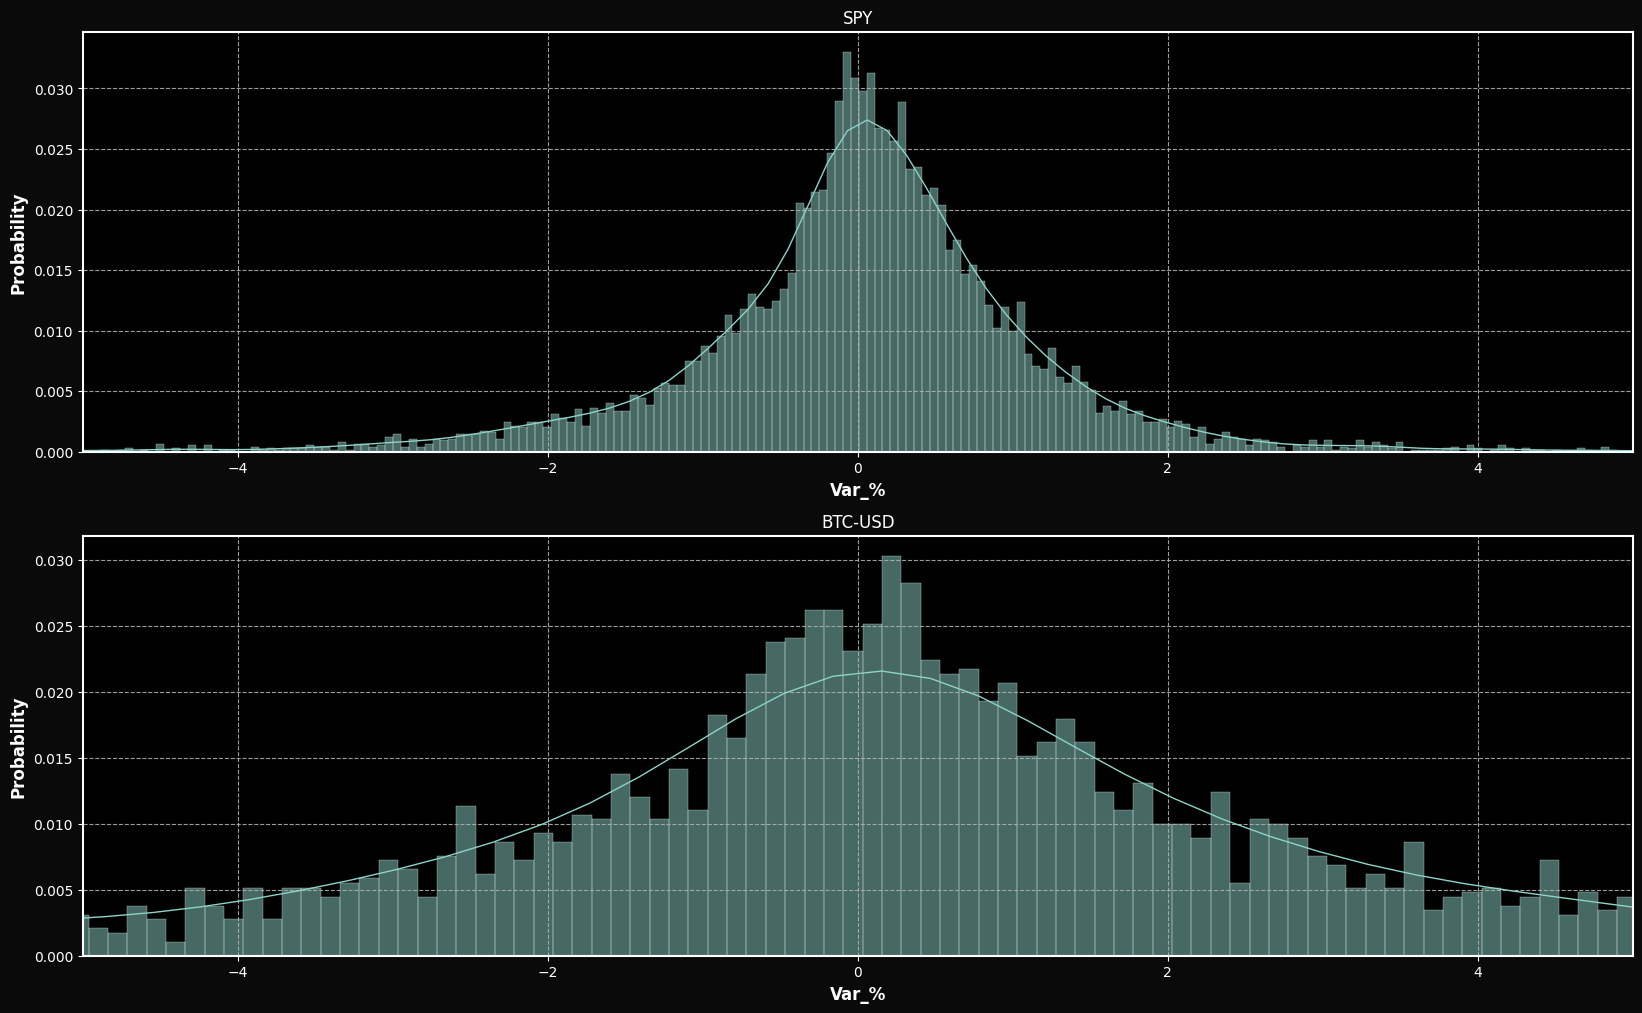

In [37]:
import seaborn as sns

data2=yf.download('BTC-USD',auto_adjust=True)
data2['Var_%']=data2['Close'].pct_change()*100

plt.figure(figsize=(20,12))
plt.subplot(211)
sns.histplot(data['Var_%'],
             bins=500,
             kde=True,
             stat='probability')#count probability
plt.xlim(-5,5)
plt.title('SPY')   

plt.subplot(212)
sns.histplot(data2['Var_%'],
             bins=500,
             kde=True,
             stat='probability')#count probability
plt.title('BTC-USD')             
plt.xlim(-5,5)

In [38]:
import plotly.express as px
import plotly.io as pio


fig = px.histogram(data, x="Var_%",range_x=(-5,5),template="plotly_dark", histnorm='probability')#range_x=(-5,5), histnorm='probability'
fig.show()

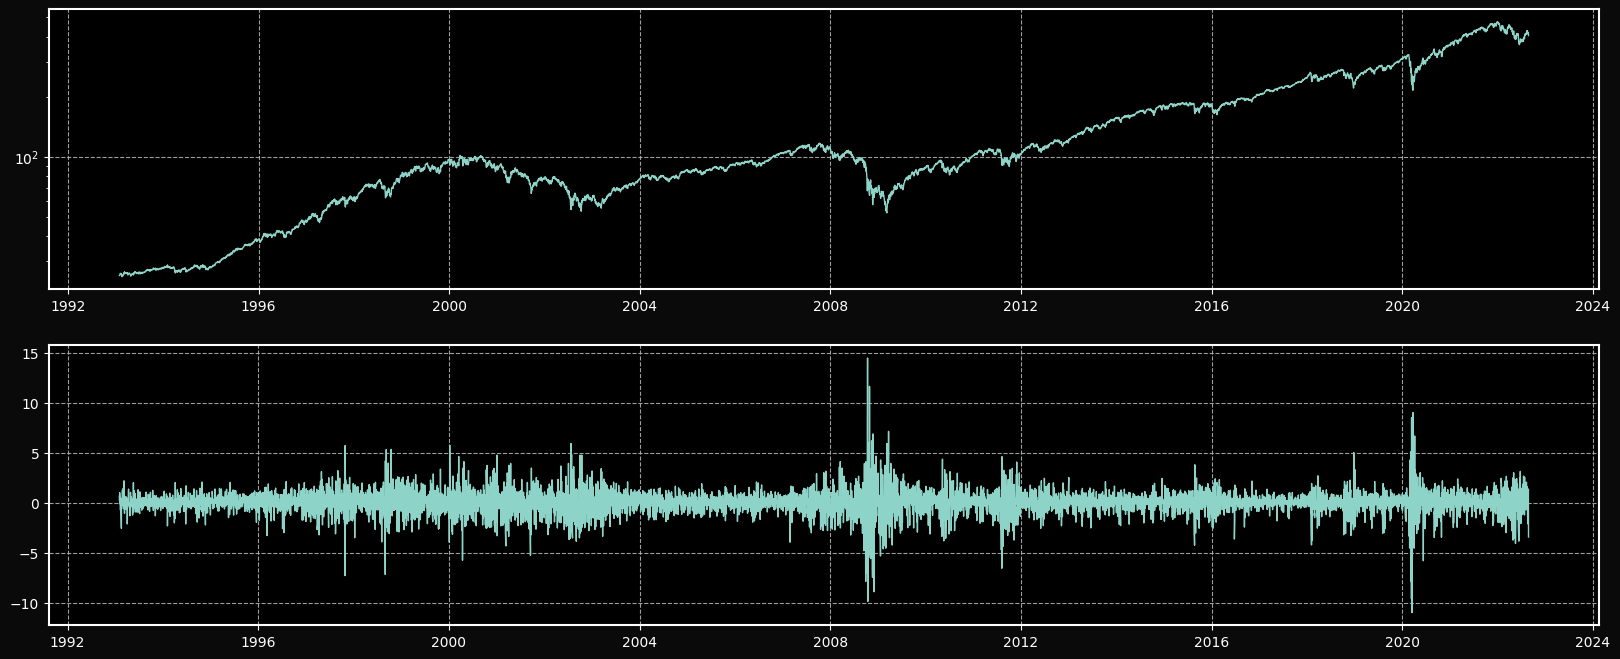

In [39]:
plt.figure(figsize=(20,8))
plt.subplot(211) #(#filas, #columnas, # figura)
plt.semilogy(data['Close']) #semilogy: escala logaritmica
plt.subplot(212)
plt.plot(data['Var_%'])

(-5.0, 5.0)

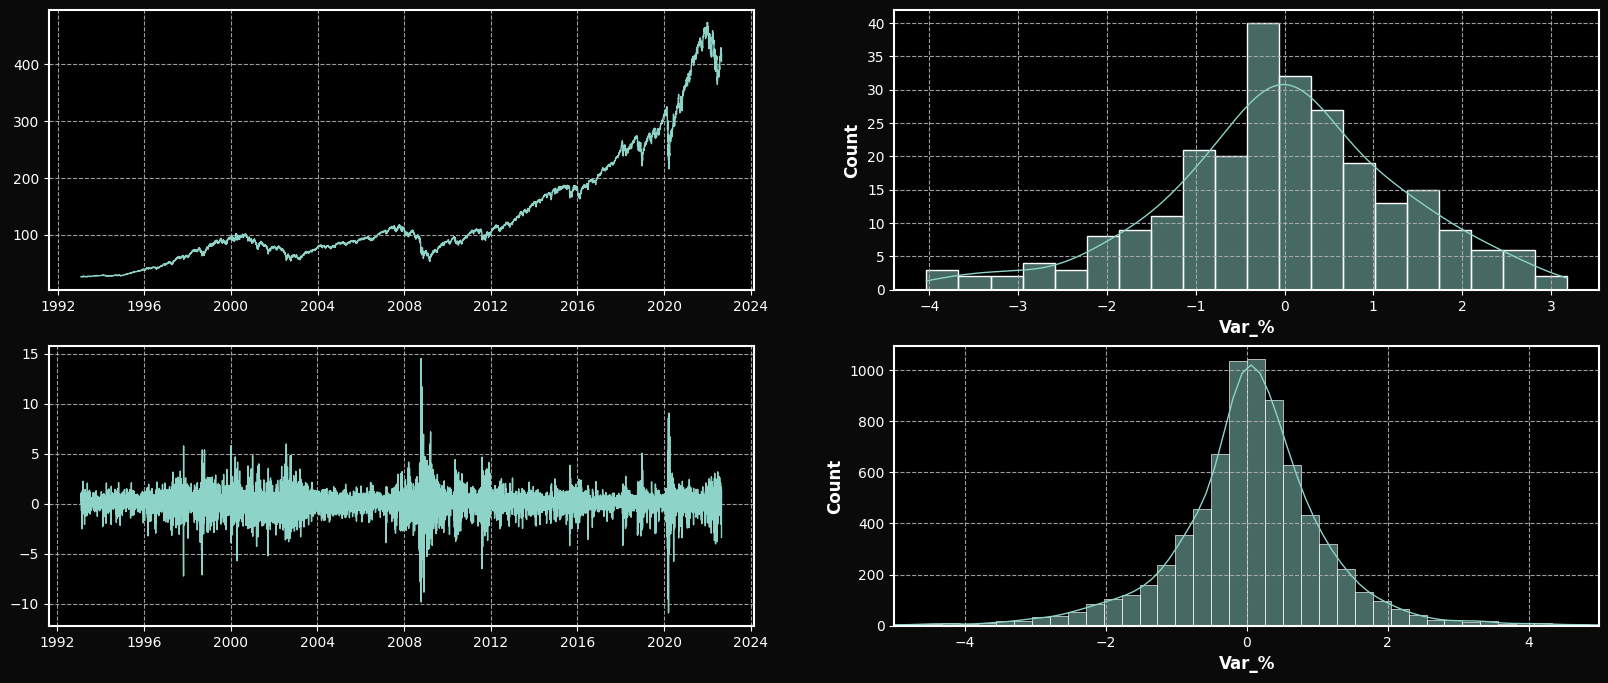

In [40]:
plt.figure(figsize=(20,8))

#arriba a la izq
plt.subplot(221)
plt.plot(data['Close']) #semilogy

#abajo a la izq
plt.subplot(223)
plt.plot(data['Var_%'])

#arriba a la der
plt.subplot((222))
sns.histplot(data[-252:]['Var_%'],
             bins=20,
             kde=True,
             stat='count')#count probability

#abajo a la der
plt.subplot((224))
sns.histplot(data['Var_%'],
             bins=100,
             kde=True,
             stat='count')#count probability   
plt.xlim(-5,5)   

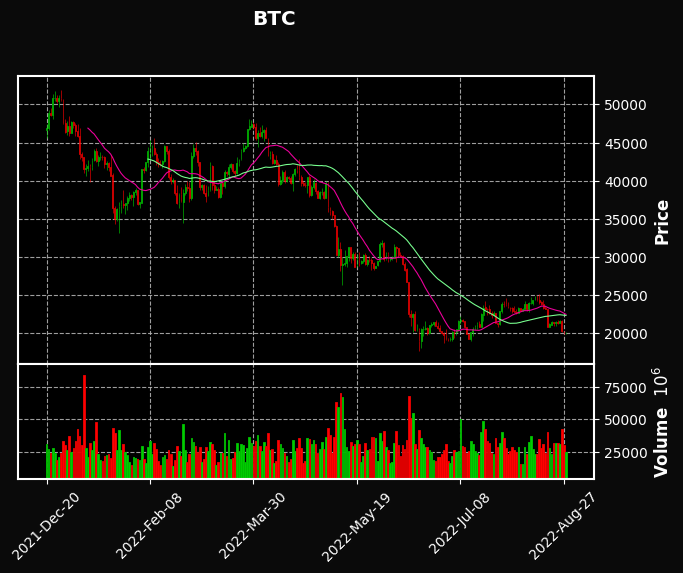

In [43]:
#colores custom
mc = mpf.make_marketcolors(up='#00cc00',down='#ff0000',inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='mike',marketcolors=mc)

mpf.plot(data2[-252:],type='candle',volume=True, title='BTC', mav=(21,50),style=s)

In [44]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
  
  
fig = go.Figure(data=[go.Histogram(y=data['Var_%'])])
fig.update_layout(template = 'plotly_dark',
                  xaxis_title='probabilidad',
                  yaxis_title='retorno %',
                  title_text="retornos SPY")
fig.show()